# Author: Akhila S
    Data Science and Business Analytics Intern
    Task 2:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

###### Importing the necessary libraries

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###### Reading the iris dataset

In [74]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

###### Displaying the first 5 rows of the dataset

In [75]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###### Displaying the last 5 rows of the dataset

In [76]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


###### Displaying the shape of the dataframe

In [77]:
iris_df.shape

(150, 4)

###### Displaying the information 

In [78]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


###### Describing the dataset

In [79]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### To find the optimum number of clusters use the elbow method

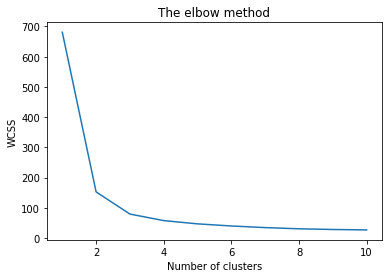

In [80]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

###### From the above graph we can conclude the no of clusters=3

###### Apply the KMeans classifier 

In [81]:
kmeans = KMeans(n_clusters=3)  
model=kmeans.fit_predict(x) 

###### Visualize the cluster points through plotting

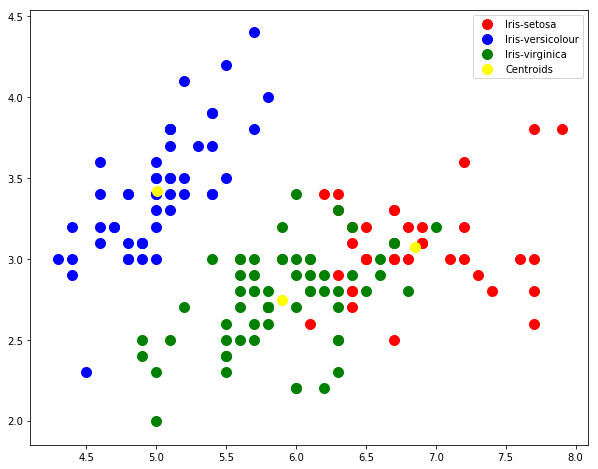

In [82]:
plt.figure(figsize=(10,8))
plt.scatter(x[model == 0, 0], x[model == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[model == 1, 0], x[model == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[model == 2, 0], x[model == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=100,color='yellow',label='Centroids')
plt.legend()

###### Displaying the 3 cluster centers

In [83]:
print("Cluster centers",kmeans.cluster_centers_)

Cluster centers [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
